In [1]:
# Multivariate data analysis

In [ ]:
# 12.1 visualizing multivariate corrlections

In [2]:
import seaborn as sns
sns.set()

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.shape

(150, 5)

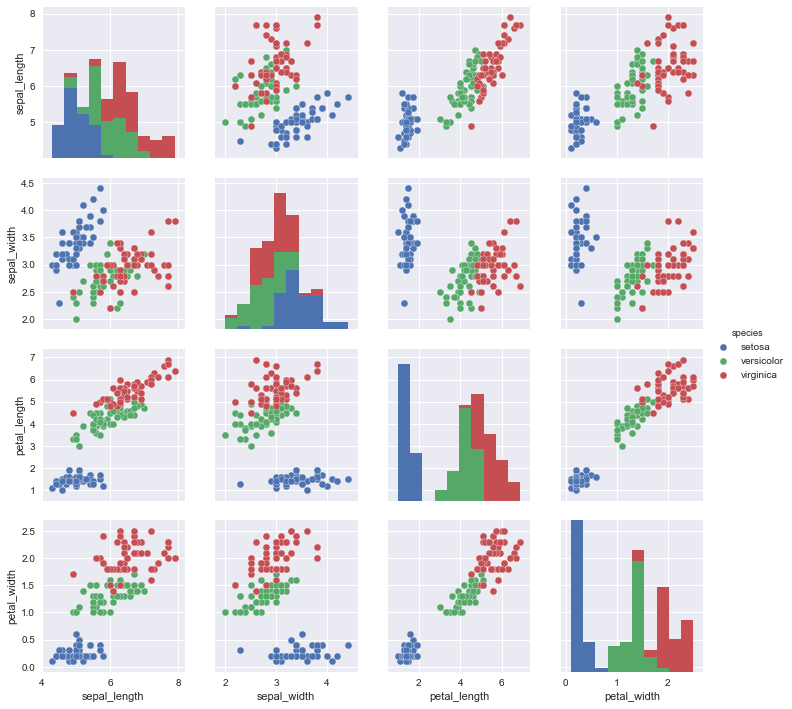

In [7]:
sns.pairplot(df, hue = 'species', size = 2.5)

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [11]:
rs = np.random.RandomState(33)
d = rs.normal(size=(100, 30))

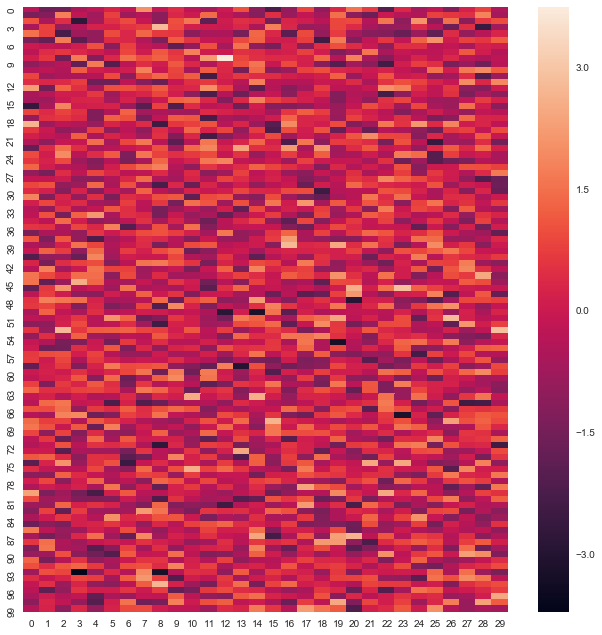

In [16]:
# sns.corrplot is not in use anymore
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(d)

f.tight_layout()

In [19]:
# The standard imports
%pylab inline
import pandas as pd
# For the 3d plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For the statistic
from statsmodels.formula.api import ols

Populating the interactive namespace from numpy and matplotlib


In [21]:
# Generate and show the data
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

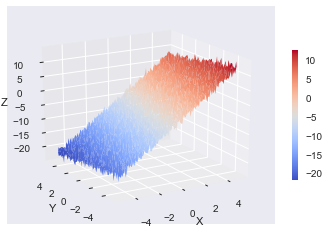

In [22]:
# Plot the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)

In [23]:
# Simple plane fit
M = np.vstack((np.ones(len(X)), X, Y)).T
bestfit = np.linalg.lstsq(M,Z)[0]
print('Best fit plane:', bestfit)

Best fit plane: [[ 2.60945434e+12 -5.74735758e+12  2.59867368e+12 ...  2.89404517e+12
  -6.27954010e+12  9.15740827e+12]
 [ 9.21059691e+12 -5.13320411e+09 -4.06802420e+12 ...  1.61011027e+13
   1.27732503e+12 -1.67209453e+12]
 [ 6.12190936e+11  7.84240167e+12 -5.73781467e+12 ...  1.39967179e+12
   9.11364339e+12 -9.80788236e+12]
 ...
 [-7.64762671e+10 -1.73751574e+11  1.66489597e+11 ... -1.69396042e+11
  -2.07283195e+11  2.20338847e+11]
 [-3.63726012e+10 -6.53033000e+10  1.46852367e+10 ...  8.98293866e+10
  -9.50047767e+10  7.49928599e+10]
 [-9.88672535e+10  6.31061270e+10 -7.74712792e+08 ... -1.48355800e+11
   5.82468300e+10 -8.31962770e+10]]


In [24]:
# Multilinear regression model
# calculate fit, P-values, confidence intervals etc.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
# Convert the data into a Pandas DataFrame
df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})

# Fit the model
model = ols("z ~ x + y", df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.988e+05
Date:                Fri, 15 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:06:01   Log-Likelihood:                -14511.
No. Observations:               10201   AIC:                         2.903e+04
Df Residuals:                   10198   BIC:                         2.905e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0098      0.010   -504.135      0.0

In [ ]:
# https://github.com/thomas-haslwanter/statsintro_python/blob/master/ipynb/12_multilinearRegression.ipynb